<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Dict" data-toc-modified-id="Dict-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Dict</a></span></li></ul></li><li><span><a href="#Check-here-Dotun:-Merci" data-toc-modified-id="Check-here-Dotun:-Merci-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Check here Dotun: Merci</a></span></li><li><span><a href="#Building-DataSet-for-only-Sarah-Pallin-and-Hilarry-Clinton" data-toc-modified-id="Building-DataSet-for-only-Sarah-Pallin-and-Hilarry-Clinton-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Building DataSet for only Sarah Pallin and Hilarry Clinton</a></span></li></ul></div>

In [270]:
# import dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from gensim.models import LdaModel
from gensim import models, corpora, similarities
import re
from nltk.stem.porter import PorterStemmer
import time
from nltk import FreqDist
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.stem.lancaster import LancasterStemmer 
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

sns.set_style("darkgrid")

In [271]:
all_filenames = ["Arianna.csv","ElizabethWarren.csv","HillaryClinton.csv","MaryBarra.csv","MelindaGates.csv",
        "MorningMika.csv","Oprah.csv","kellyanne.csv","sarahpallin.csv","LaverneCox.csv","SusanWojciciki.csv"]


In [272]:
import os
import glob
import pandas as pd
os.chdir('/Users/fatimaloumaini/')
extension = 'csv'

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [273]:
combined_csv["name"].value_counts()

Sarah Palin           17478
Kellyanne Conway       5185
Arianna Huffington     3541
Elizabeth Warren       1619
Laverne Cox            1156
Mika Brzezinski        1010
Hillary Clinton         878
Melinda Gates           595
Oprah Winfrey           340
Susan Wojcicki          262
Mary Barra               94
Name: name, dtype: int64

In [274]:
columns_remove = ['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'place', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to']

In [275]:

combined_csv= combined_csv.drop(columns = columns_remove, axis =1)



In [276]:
data= combined_csv.copy()


In [277]:


def tokenize_words(text):
    
    tknzr = TweetTokenizer()
    text = tknzr.tokenize(text)
    return text 

def initial_clean(text):
    """
    Function to remove links,pictures and video tags, numbers and puncutuations
    """
    
    text = re.sub(r"http\S+", "",text) # Remove links
    text = re.sub("#[^\s]+", "",text) # Remove links
    text = re.sub(r"pic\..*","",text) #Remove pictures and videos
    text= re.sub(r'[0-9]+', "", text) 
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])","",text)#Remove punctuations,tag and #

    return text

def lemmatize_words(text):
    """
    Function to lemmatize words
    
    """
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text] 
    
    return text
 

stop_words = stopwords.words('english')
def remove_stop_words(text):
    """
    Function that removes all stopwords from text
    """
    text = [word for word in text if word not in stop_words]
    return text 

def apply_all(text):
    """
    This function applies all the functions above into one
    """
    #return lemmatize_words(stemming_words(initial_clean(text)))
    
    clean_data = lemmatize_words(tokenize_words(initial_clean(text)))
    
  
    
    
    
    return clean_data
                        

In [278]:
# Run it in my dataset
data['tweet_cleaned'] = data['tweet'].apply(apply_all) 


In [279]:
# Removing Short tweets
data = data[data['tweet_cleaned'].map(len) >= 5]


In [280]:
data["tweet_cleaned"] = data["tweet_cleaned"].apply(lambda x:','.join(x))
data.head()


,name,tweet,tweet_cleaned
0,Arianna Huffington,"At age 79, Jim Owen eased his chronic back pai...","At,age,Jim,Owen,eased,his,chronic,back,pain,an..."
1,Arianna Huffington,Love this episode of #MeditativeStory from @Ap...,"Love,this,episode,of,from,Global,Creative,Dire..."
2,Arianna Huffington,The rise of hustle-culture has real effects on...,"The,rise,of,hustleculture,ha,real,effect,on,ou..."
4,Arianna Huffington,Excited to see @ApplePodcasts featuring #Medit...,"Excited,to,see,featuring,at,the,top,of,their,h..."
5,Arianna Huffington,"Reaching milestones should be celebrated, of c...","Reaching,milestone,should,be,celebrated,of,cou..."


In [340]:
## example workflow with plotting

from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(
    ngram_range=(1,3),
    min_df=4, 
    max_df= 0.5,
    stop_words = 'english'
)
X_ = cv.fit_transform(data["tweet_cleaned"])
X = X_.toarray()

dt = pd.DataFrame(X, columns = cv.get_feature_names())

dt.shape


(24554, 11557)

In [341]:
from sklearn.decomposition import NMF

nmf_model = NMF(5)
doc_topic = nmf_model.fit_transform(dt)


In [342]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5"],
             columns = cv.get_feature_names())
topic_word

,abandon,abandoned,abandoning,abc,abc news,abe,ability,able,aboard,abolish,...,zealand,zero,zero congestion,zero crash,zero emission,zfcom,zfcom question,zoe,zone,zuckerberg
component_1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.001
component_2,0.005,0.001,0.003,0.012,0.008,0.002,0.018,0.048,0.002,0.002,...,0.005,0.015,0.002,0.003,0.003,0.009,0.004,0.005,0.006,0.003
component_3,0.000,0.000,0.000,0.004,0.002,0.000,0.000,0.001,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_4,0.001,0.006,0.001,0.013,0.010,0.004,0.002,0.003,0.004,0.005,...,0.007,0.007,0.000,0.000,0.000,0.000,0.000,0.000,0.004,0.000
component_5,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [637]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = cv.get_feature_names()
    
    word_dict = {};
    for i in range(5):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = nmf_model.components_[i].argsort()[:-10 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [638]:
nmf_topics = get_nmf_topics(doc_topic,5)


In [639]:
nmf_topics

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,posted new,great,think,trump,need
1,photo facebook,love,wow,president,know
2,posted new photo,thank,wow think,just,people
3,new photo facebook,wa,did,president trump,need know
4,new photo,time,say,donald,help
5,posted,woman,dont think,donald trump,people need
6,facebook,day,did think,hillary,health
7,photo,just,just think,clinton,dont
8,new,today,just,obama,right
9,facebook album,good,dont,says,dont need


In [640]:
columns = {"Topic # 01": "Topic 1: Facebook","Topic # 02": "Topic 2: Women","Topic # 03": "Topic 3: Communication", "Topic # 04": "Topic 4: Politics",
          "Topic # 05": "Topic 5: Mental Health"}


In [641]:
nmf_topics.rename(columns = columns, inplace = True)

In [642]:
nmf_topics

,Topic 1: Facebook,Topic 2: Women,Topic 3: Communication,Topic 4: Politics,Topic 5: Mental Health
0,posted new,great,think,trump,need
1,photo facebook,love,wow,president,know
2,posted new photo,thank,wow think,just,people
3,new photo facebook,wa,did,president trump,need know
4,new photo,time,say,donald,help
5,posted,woman,dont think,donald trump,people need
6,facebook,day,did think,hillary,health
7,photo,just,just think,clinton,dont
8,new,today,just,obama,right
9,facebook album,good,dont,says,dont need


In [643]:
for i,topic in enumerate(nmf_model.components_):
    print(f'Top 20 words for topic #{i+1}:')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 20 words for topic #1:
['facebook album', 'new', 'photo', 'facebook', 'posted', 'new photo', 'new photo facebook', 'posted new photo', 'photo facebook', 'posted new']


Top 20 words for topic #2:
['good', 'today', 'just', 'day', 'woman', 'time', 'wa', 'thank', 'love', 'great']


Top 20 words for topic #3:
['dont', 'just', 'just think', 'did think', 'dont think', 'say', 'did', 'wow think', 'wow', 'think']


Top 20 words for topic #4:
['says', 'obama', 'clinton', 'hillary', 'donald trump', 'donald', 'president trump', 'just', 'president', 'trump']


Top 20 words for topic #5:
['dont need', 'right', 'dont', 'health', 'people need', 'help', 'need know', 'people', 'know', 'need']




In [293]:
doc_topic.size

122770

In [355]:
from sklearn import manifold


tsne = manifold.TSNE(perplexity= 50,n_iter=3000)

data_to_plot = tsne.fit_transform(doc_topic)

In [ ]:
# list_indexes = []
# for index in data["name"] =="Michelle Obama":
#     list_indexes.append(index)

In [397]:
plot_df

,x,y,author
0,57.331425,-34.618084,Arianna Huffington
1,-37.860073,-54.970032,Arianna Huffington
2,1.977468,-33.538456,Arianna Huffington
3,46.010941,-42.327782,Arianna Huffington
4,126.401093,-0.078111,Arianna Huffington
5,-44.288193,96.719490,Arianna Huffington
6,1.884808,-112.169685,Arianna Huffington
7,12.883219,-61.283806,Arianna Huffington
8,-8.544954,-127.777855,Arianna Huffington
9,33.939270,-107.664474,Arianna Huffington


Populating the interactive namespace from numpy and matplotlib


([], <a list of 0 Text yticklabel objects>)

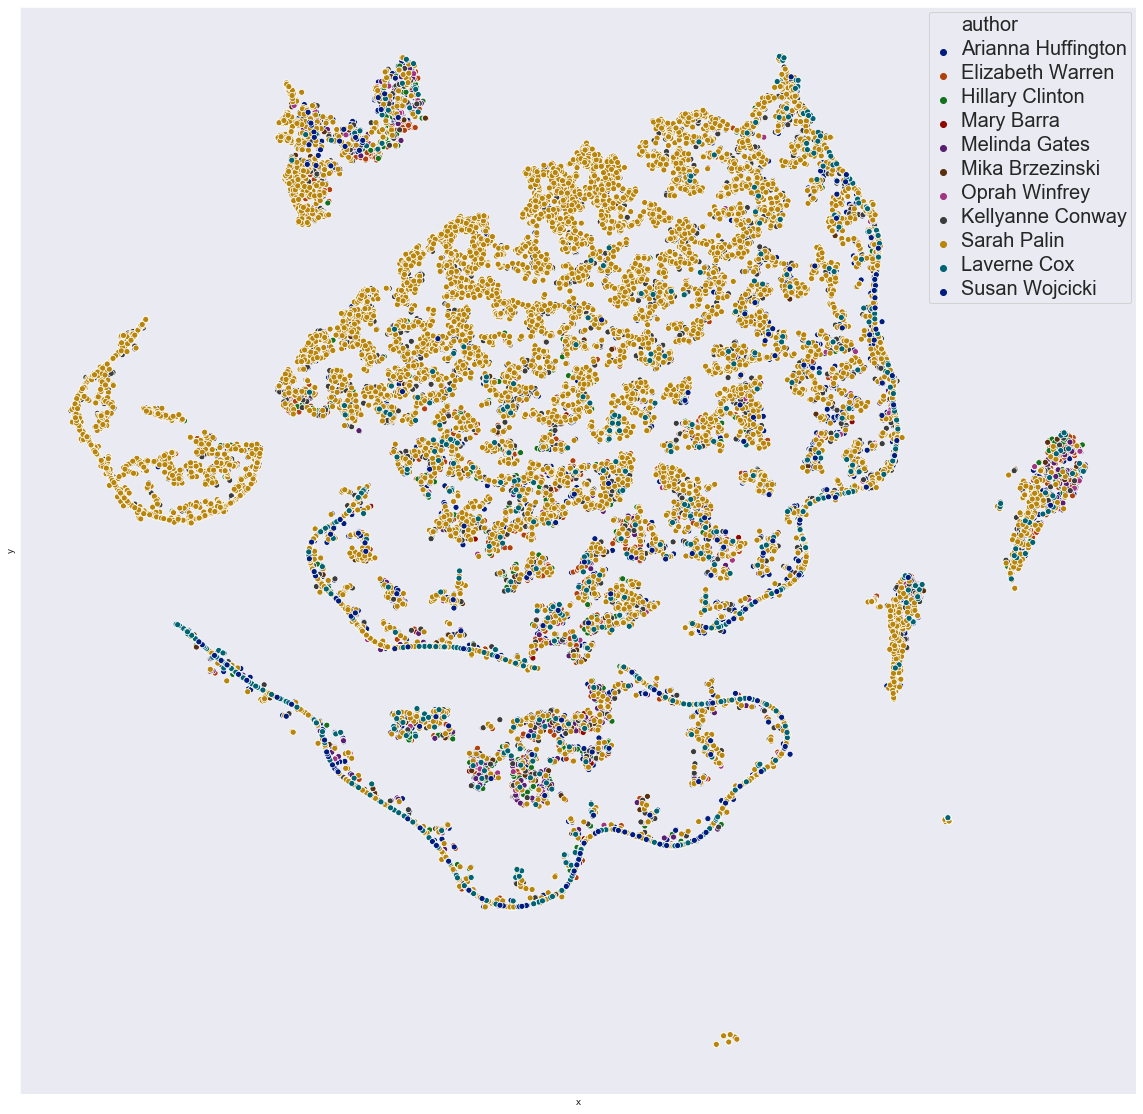

In [705]:

%pylab inline
figsize(20,20)
current_palette = sns.color_palette()
plot_df = pd.DataFrame()
women =["Hillary Clinton","Sarah Palin"]
#cmap = sns.color_palette("RdBu_r", 13)
plot_df["x"] = data_to_plot[:,0]
plot_df["y"] = data_to_plot[:,1]
plot_df["author"] = list(data["name"])

g =sns.scatterplot("x", "y", hue="author", data=plot_df,palette= "dark")
plt.setp(g.get_legend().get_texts(),fontsize = '20')
plt.xticks([])
plt.yticks([])





In [544]:
# Let's compare Laverne Cox with Sarah Palin
all_filenames_ = ["sarahpallin.csv","LaverneCox.csv"]

import os
import glob
import pandas as pd
os.chdir('/Users/fatimaloumaini/')
extension = 'csv'

#combine all files in the list
combined_csv_ = pd.concat([pd.read_csv(f) for f in all_filenames_])
#export to csv
combined_csv_.to_csv( "combined_csv_.csv", index=False, encoding='utf-8-sig')

In [545]:
columns_remove = ['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'place', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to']

In [546]:

combined_csv_= combined_csv_.drop(columns = columns_remove, axis =1)


In [547]:
data_2= combined_csv_.copy()

In [548]:
# Run it in my dataset
data_2['tweet_cleaned'] = data_2['tweet'].apply(apply_all) 

In [549]:
# Removing Short tweets
# Run it in my dataset
data_2['tweet_cleaned'] = data_2['tweet'].apply(apply_all) 
data_2 = data_2[data_2['tweet_cleaned'].map(len) >= 5]
data_2["tweet_cleaned"] = data_2["tweet_cleaned"].apply(lambda x:','.join(x))
data_2.head()

,name,tweet,tweet_cleaned
0,Sarah Palin,“This is—and has always been—a case about medi...,"This,isand,ha,always,beena,case,about,medium,a..."
1,Sarah Palin,Tomorrow with these amazing legends...🇺🇸🏁 @Rus...,"Tomorrow,with,these,amazing,legend,and,Plus,mo..."
2,Sarah Palin,At Sturgis with amazing racing legends... @Rus...,"At,Sturgis,with,amazing,racing,legend,and,Supp..."
3,Sarah Palin,Our condolences to John and all those who had ...,"Our,condolence,to,John,and,all,those,who,had,t..."
4,Sarah Palin,#WalkAway Campaign just launched its (re)educa...,"Campaign,just,launched,it,reeducational,video,..."


In [550]:
## example workflow with plotting

from sklearn.feature_extraction.text import TfidfVectorizer
cv_2 = TfidfVectorizer(
    ngram_range=(1,3),
    min_df=4, 
    max_df= 0.5,
    stop_words = 'english'
)
X_2 = cv_2.fit_transform(data_2["tweet_cleaned"])
X2= X_2.toarray()

dt_2 = pd.DataFrame(X2, columns = cv_2.get_feature_names())

dt_2.shape

(12227, 5443)

In [551]:
data_2.iloc[1234]

name                                                   Sarah Palin
tweet            Rep. Crenshaw Announces What He's Doing With H...
tweet_cleaned    Rep,Crenshaw,Announces,What,Hes,Doing,With,His...
Name: 1312, dtype: object

In [552]:
testing_data_2 = data_2.groupby(by = "name")["tweet_cleaned"].sum()
testing_data_2= testing_data_2.to_frame()
testing_data_2

,tweet_cleaned
name,
Laverne Cox,"The,remixes,should,still,be,there,They,are,on,..."
Sarah Palin,"This,isand,ha,always,beena,case,about,medium,a..."


In [553]:
## example workflow with plotting

from sklearn.feature_extraction.text import TfidfVectorizer
cv_grouped = TfidfVectorizer(
    #ngram_range=(1,2),
    #min_df=2, 
   max_df= 0.5,
    stop_words = 'english'
)
X_grouped = cv_grouped.fit_transform(testing_data_2["tweet_cleaned"])
Xgrouped = X_grouped.toarray()

dt_grouped = pd.DataFrame(Xgrouped, columns = cv_grouped.get_feature_names())

dt_grouped.shape

(2, 22610)

In [626]:
dt_grouped.iloc[0][:13]
#doc_topic[::10,:])

aair              0.0
aand              0.0
aanother          0.0
aaron             0.0
aaudience         0.0
abandon           0.0
abandoned         0.0
abandonedwatch    0.0
abandoning        0.0
abandons          0.0
abarack           0.0
abbott            0.0
abcfallen         0.0
Name: 0, dtype: float64

In [630]:
dt_grouped.loc[1,"trumps"]

0.1638460935403951

In [635]:
dt_grouped.loc[0,"orientation"]

0.03561505160830613

In [636]:
dt_grouped.loc[1,"orientation"]

0.0

In [607]:
from nltk.probability import FreqDist
fdist = FreqDist(dt_grouped.iloc[1])
fdist.most_common(30)

[(0.000941644215749397, 16134),
 (0.001883288431498794, 2059),
 (0.0, 1117),
 (0.002824932647248191, 859),
 (0.003766576862997588, 527),
 (0.004708221078746986, 345),
 (0.005649865294496382, 254),
 (0.00659150951024578, 195),
 (0.007533153725995176, 148),
 (0.008474797941744574, 121),
 (0.009416442157493972, 104),
 (0.010358086373243367, 90),
 (0.011299730588992763, 68),
 (0.012241374804742161, 58),
 (0.01318301902049156, 48),
 (0.014124663236240956, 47),
 (0.01600795166773975, 45),
 (0.015066307451990352, 41),
 (0.016949595883489148, 32),
 (0.017891240099238544, 23),
 (0.018832884314987943, 23),
 (0.01977452853073734, 19),
 (0.024482749609484322, 15),
 (0.020716172746486735, 14),
 (0.021657816962236134, 14),
 (0.023541105393734926, 14),
 (0.022599461177985527, 13),
 (0.02636603804098312, 13),
 (0.03954905706147468, 11),
 (0.02919097068823131, 11)]

In [606]:
dt_grouped.loc["0.9170875789138827"]

KeyError: '0.9170875789138827'

In [555]:
from sklearn.decomposition import NMF

nmf_model_grouped = NMF(5)
doc_topic_grouped = nmf_model_grouped.fit_transform(dt_grouped)

In [556]:
topic_word_grouped = pd.DataFrame(nmf_model_grouped.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5"],
             columns = cv_grouped.get_feature_names())
topic_word_grouped

,aair,aand,aanother,aaron,aaudience,abandon,abandoned,abandonedwatch,abandoning,abandons,...,zip,zippingi,zoller,zombie,zone,zoo,zteobama,zucchini,zuckerberg,zuckerbergs
component_1,0.006,0.010,0.000,0.007,0.006,0.000,0.019,0.003,0.006,0.020,...,0.000,0.000,0.000,0.008,0.030,0.000,0.007,0.000,0.041,0.005
component_2,0.007,0.000,0.005,0.005,0.003,0.013,0.028,0.009,0.020,0.004,...,0.021,0.014,0.006,0.002,0.008,0.005,0.004,0.010,0.003,0.008
component_3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_5,0.000,0.008,0.023,0.002,0.010,0.004,0.019,0.005,0.008,0.006,...,0.018,0.001,0.018,0.007,0.003,0.021,0.005,0.011,0.019,0.000


In [664]:
def get_nmf_topics_grouped(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = cv_grouped.get_feature_names()
    
    word_dict = {};
    for i in range(5):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = nmf_model_grouped.components_[i].argsort()[:- - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [665]:
nmf_topics_grouped = get_nmf_topics_grouped(doc_topic_grouped,5)
nmf_topics_grouped

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,photo,outrage,trans,trans,son
1,posted,suffers,trauma,trauma,accomplished
2,obama,surprises,obsessed,stonewall,strengthen
3,says,fundamental,stonewall,obsessed,pc
4,border,obstructionist,werk,makeup,crossings
5,trumps,quack,thread,leontyne,yourselfits
6,big,cotton,amplifying,amplifying,burnetts
7,democrats,heck,leontyne,thread,feet
8,american,weinstein,makeup,werk,chairwoman
9,democrat,anchor,existence,size,leaking


In [652]:
topic_word_grouped

,aair,aand,aanother,aaron,aaudience,abandon,abandoned,abandonedwatch,abandoning,abandons,...,zip,zippingi,zoller,zombie,zone,zoo,zteobama,zucchini,zuckerberg,zuckerbergs
component_1,0.006,0.010,0.000,0.007,0.006,0.000,0.019,0.003,0.006,0.020,...,0.000,0.000,0.000,0.008,0.030,0.000,0.007,0.000,0.041,0.005
component_2,0.007,0.000,0.005,0.005,0.003,0.013,0.028,0.009,0.020,0.004,...,0.021,0.014,0.006,0.002,0.008,0.005,0.004,0.010,0.003,0.008
component_3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_5,0.000,0.008,0.023,0.002,0.010,0.004,0.019,0.005,0.008,0.006,...,0.018,0.001,0.018,0.007,0.003,0.021,0.005,0.011,0.019,0.000


In [695]:
t_laverne_cox=dt_grouped.iloc[0]["impact"]
t_laverne_cox

0.0

In [690]:
t_sarah_palin_3=dt_grouped.iloc[1]["intense"]
t_sarah_palin_3

0.0

In [560]:
topic_word_grouped.loc["component_3"]["trans"]

10.449

In [561]:
laverne_cox=dt_grouped.iloc[0]["trans"]
laverne_cox

0.9170875789138827

In [562]:
sarah_palin=dt_grouped.iloc[1]["trans"]
sarah_palin

0.0

In [564]:
laverne_cox_2=dt_grouped.iloc[0]["gop"]
laverne_cox_2

0.0

In [602]:
sarah_palin_3=dt_grouped.iloc[1]["alaska"]
sarah_palin_3

0.10358086373243368

In [565]:
sarah_palin_2=dt_grouped.iloc[1]["gop"]
sarah_palin_2

0.10828908481118066

In [566]:
sarah_palin=dt_grouped.iloc[0]["dating"]

In [567]:
doc_topic_2.shape

(12227, 5)

In [568]:
doc_topic_2

array([[0.00000000e+00, 1.39724296e-04, 2.21120154e-02, 3.20682979e-06,
        4.46383517e-03],
       [0.00000000e+00, 0.00000000e+00, 1.90586605e-02, 5.56786872e-04,
        0.00000000e+00],
       [0.00000000e+00, 4.74117970e-04, 3.08142937e-02, 8.65518152e-04,
        0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.88020733e-02, 1.74747342e-03,
        1.69229925e-03],
       [0.00000000e+00, 4.20880426e-04, 2.91061578e-02, 2.50663816e-03,
        0.00000000e+00],
       [0.00000000e+00, 3.53035794e-02, 1.12853947e-02, 1.94055214e-03,
        4.46398287e-04]])

In [569]:
topic_word_2 = pd.DataFrame(nmf_model_2.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5"],
             columns = cv_2.get_feature_names())
topic_word_2

,abandoned,abc,abc news,abe,able,abolish,aborted,abortion,abortions,abrams,...,youve,youve got,youve got kidding,youve got read,youve heard,yr,yup,zealand,zero,zuckerberg
component_1,0.00,0.000,0.000,0.00,0.000,0.000,0.000,0.002,0.000,0.000,...,0.001,0.001,0.00,0.000,0.000,0.000,0.000,0.002,0.000,0.001
component_2,0.00,0.002,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,...,0.003,0.000,0.00,0.002,0.005,0.000,0.000,0.000,0.000,0.000
component_3,0.00,0.018,0.012,0.00,0.013,0.001,0.003,0.009,0.000,0.001,...,0.181,0.157,0.06,0.022,0.008,0.005,0.011,0.000,0.000,0.006
component_4,0.00,0.000,0.000,0.00,0.002,0.000,0.000,0.007,0.000,0.000,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.001
component_5,0.01,0.005,0.002,0.01,0.005,0.008,0.001,0.026,0.006,0.000,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.013,0.013,0.000


In [570]:
topic_word_2.loc["component_5"]["border wall"]

0.139

In [571]:
def get_nmf_topics_2(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = cv_2.get_feature_names()
    
    word_dict = {};
    for i in range(5):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = nmf_model_2.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [572]:
nmf_topics_2 = get_nmf_topics_2(doc_topic_2,5)
nmf_topics_2

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,posted new,think,just,need,trump
1,new photo facebook,wow,good,know,president
2,posted new photo,wow think,love,people,president trump
3,new photo,did think,thank,need know,obama
4,photo facebook,just think,great,people need,border
5,posted,say,news,right,donald
6,facebook,think mean,did,story,says
7,photo,mean,look,tell,donald trump
8,new,did,wa,read,wall
9,posted photo facebook,interesting,time,help,house


In [573]:
for i,topic in enumerate(nmf_model_2.components_):
    print(f'Top 20 words for topic #{i+1}:')
    print([cv_2.get_feature_names()[i] for i in topic.argsort()[-20:]])
    print('\n')

Top 20 words for topic #1:
['signing', 'joy book', 'great joy book', 'book signing', 'joy book signing', 'book', 'album', 'facebook album', 'posted photo', 'photo facebook album', 'posted photo facebook', 'new', 'photo', 'facebook', 'posted', 'photo facebook', 'new photo', 'posted new photo', 'new photo facebook', 'posted new']


Top 20 words for topic #2:
['happen', 'interesting think', 'really', 'check', 'big', 'dont', 'think come', 'really think', 'dont think', 'comment', 'interesting', 'did', 'mean', 'think mean', 'say', 'just think', 'did think', 'wow think', 'wow', 'think']


Top 20 words for topic #3:
['going', 'say', 'happy', 'like', 'got', 'people', 'wow', 'today', 'day', 'check', 'time', 'wa', 'look', 'did', 'news', 'great', 'thank', 'love', 'good', 'just']


Top 20 words for topic #4:
['world', 'stop', 'american', 'amazing', 'spread', 'truly', 'seen', 'need right', 'share', 'fact', 'help', 'read', 'tell', 'story', 'right', 'people need', 'need know', 'people', 'know', 'need'

In [599]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(dt_2, dt_2))

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.23528996 ... 0.         0.         0.        ]
 [0.         0.23528996 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


## Dict

In [589]:
class mydict():
    def __init__(self,cv):
        self.token2id = cv_2.vocabulary_
        self.id2token = dict((v, k) for k, v in cv_2.vocabulary_.items())
        

In [590]:
counting = mydict(cv_2)
mydictionary=counting.token2id

In [592]:
mydictionary

{'ha': 2005,
 'case': 669,
 'medium': 2959,
 'accountability': 26,
 'decision': 1150,
 'look': 2799,
 'forward': 1738,
 'starting': 4487,
 'discovery': 1279,
 'ultimately': 5053,
 'trial': 4914,
 'attorneys': 294,
 'elizabeth': 1442,
 'look forward': 2800,
 'tomorrow': 4840,
 'amazing': 141,
 'legend': 2701,
 'plus': 3559,
 'benefiting': 406,
 'great': 1938,
 'charity': 721,
 'special': 4424,
 'olympics': 3341,
 'nascar': 3147,
 'foundation': 1744,
 'sturgis': 4565,
 'racing': 3779,
 'supporting': 4605,
 'cause': 681,
 'check': 728,
 'condolence': 926,
 'john': 2452,
 'honor': 2187,
 'privilege': 3678,
 'knowing': 2612,
 'absolute': 11,
 'class': 794,
 'act': 40,
 'kindness': 2598,
 'heart': 2097,
 'world': 5354,
 'better': 424,
 'place': 3537,
 'sarah': 4113,
 'palin': 3416,
 'class act': 795,
 'world better': 5355,
 'better place': 425,
 'sarah palin': 4116,
 'world better place': 5356,
 'campaign': 632,
 'just': 2505,
 'launched': 2651,
 'video': 5140,
 'series': 4232,
 'hard': 2057

In [578]:
from sklearn import manifold


tsne_2 = manifold.TSNE(perplexity= 50,n_iter=5000)

data_to_plot_2 = tsne_2.fit_transform(doc_topic_2)

In [575]:
print(plot_df.shape, data.shape,data_to_plot.shape,doc_topic.shape)

(24554, 3) (24554, 3) (24554, 2) (24554, 5)


In [576]:
print(plot_df_2.shape, data_2.shape,data_to_plot_2.shape,doc_topic_2.shape)

(12227, 3) (12227, 3) (12227, 2) (12227, 5)


Populating the interactive namespace from numpy and matplotlib


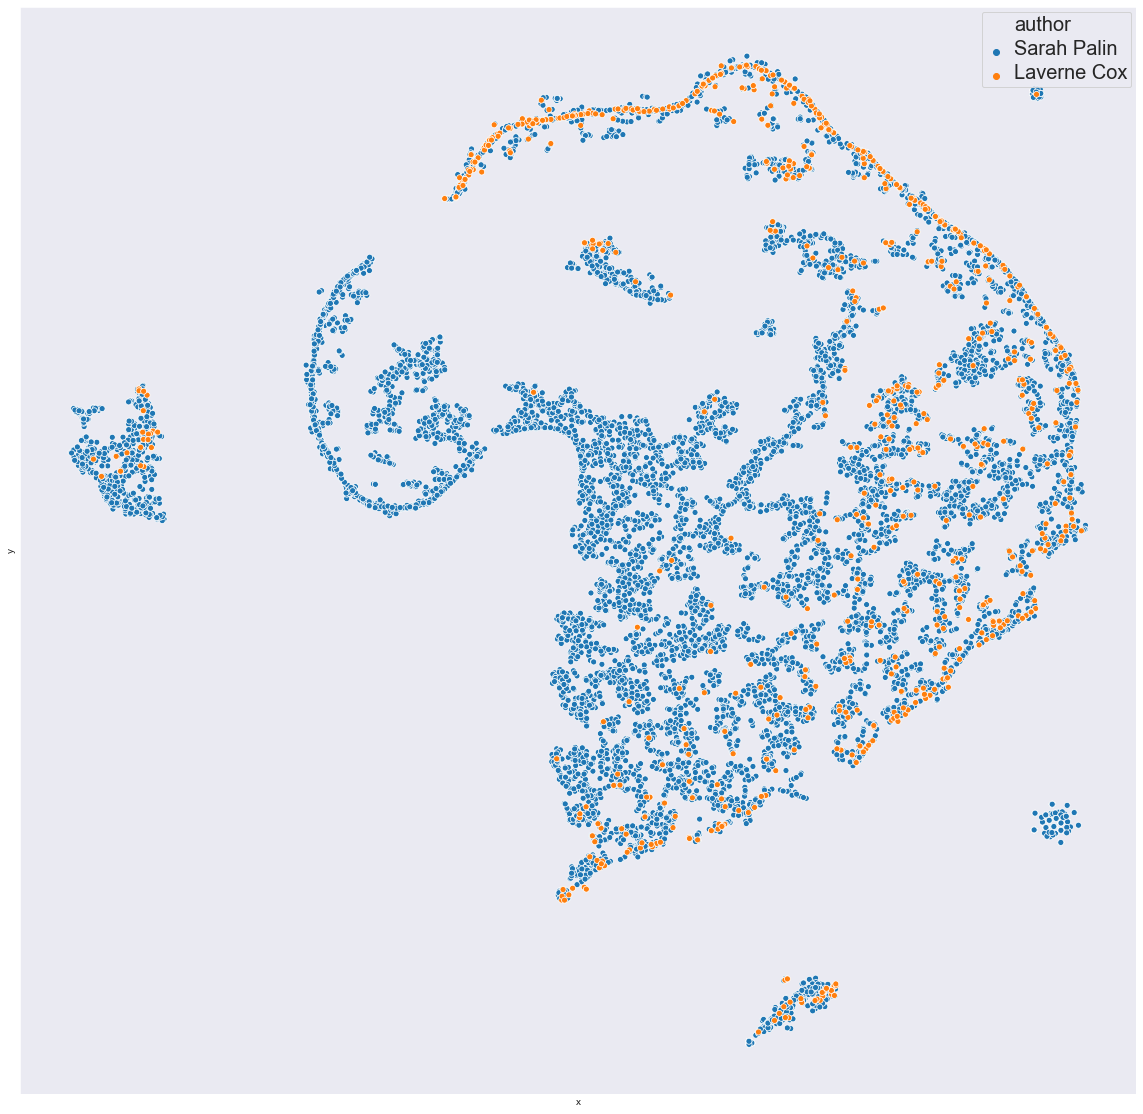

In [713]:
%pylab inline
figsize(20,20)
current_palette = sns.color_palette()
plot_df_2 = pd.DataFrame()

#cmap = sns.color_palette("RdBu_r", 13)
plot_df_2["x"] = data_to_plot_2[:,0]
plot_df_2["y"] = data_to_plot_2[:,1]
plot_df_2["author"] = list(data_2["name"])

f= sns.scatterplot("x", "y", hue="author", data=plot_df_2)
plt.setp(f.get_legend().get_texts(),fontsize = '20')
plt.xticks([])
plt.yticks([]);



In [ ]:
# Comparing Tucker Carlson and Kellyanne Conway

In [437]:

all_filenames_last = ["tucker.csv","kellyanne.csv"]

import os
import glob
import pandas as pd
os.chdir('/Users/fatimaloumaini/')
extension = 'csv'

#combine all files in the list
combined_csv_last = pd.concat([pd.read_csv(f) for f in all_filenames_last])
#export to csv
combined_csv_last.to_csv( "combined_csv_last.csv", index=False, encoding='utf-8-sig')

In [438]:
combined_csv_last= combined_csv_last.drop(columns = columns_remove, axis =1)


In [439]:
data_3= combined_csv_last.copy()

In [440]:
data_3['tweet_cleaned'] = data_3['tweet'].apply(apply_all) 
data_3 = data_3[data_3['tweet_cleaned'].map(len) >= 5]
data_3["tweet_cleaned"] = data_3["tweet_cleaned"].apply(lambda x:','.join(x))
data_3.head()

,name,tweet,tweet_cleaned
0,Tucker Carlson,Here's why they're pushing racial division: so...,"Heres,why,theyre,pushing,racial,division,so,yo..."
1,Tucker Carlson,There’s been a tremendous response to last nig...,"Theres,been,a,tremendous,response,to,last,nigh..."
2,Tucker Carlson,TONIGHT: Tucker Carlson Tonight confronted Nan...,"TONIGHT,Tucker,Carlson,Tonight,confronted,Nanc..."
3,Tucker Carlson,No country can survive being ruled by people w...,"No,country,can,survive,being,ruled,by,people,w..."
4,Tucker Carlson,Tucker Carlson: Ilhan Omar @ilhan wants to pul...,"Tucker,Carlson,Ilhan,Omar,want,to,pull,u,off,t..."


In [441]:
## example workflow with plotting

from sklearn.feature_extraction.text import TfidfVectorizer
cv_3 = TfidfVectorizer(
    ngram_range=(1,3),
    min_df=4, 
    max_df= 0.5,
    stop_words = 'english'
)
X_3 = cv_3.fit_transform(data_3["tweet_cleaned"])
X3= X_3.toarray()

dt_3 = pd.DataFrame(X3, columns = cv_3.get_feature_names())

dt_3.shape


(7741, 3638)

In [442]:
from sklearn.decomposition import NMF

nmf_model_3 = NMF(5)
doc_topic_3 = nmf_model_3.fit_transform(dt_3)

In [443]:
topic_word_3 = pd.DataFrame(nmf_model_3.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5"],
             columns = cv_3.get_feature_names())
topic_word_3

,abc,abc news,ability,able,abort,abortion,abortion anytime,abortion provider,absolute,absolute power,...,youve,youve got,youve heard,youve heard today,youve seen,youve seen lately,yr,yr old,zero,zone
component_1,0.03,0.023,0.014,0.019,0.003,0.079,0.011,0.004,0.002,0.000,...,0.008,0.005,0.000,0.00,0.000,0.000,0.034,0.005,0.016,0.000
component_2,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.001,0.000,0.000
component_3,0.00,0.000,0.005,0.030,0.001,0.008,0.000,0.000,0.028,0.027,...,0.028,0.000,0.012,0.01,0.011,0.011,0.000,0.000,0.000,0.017
component_4,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.001,0.000,0.000,0.00,0.000,0.000,0.008,0.001,0.000,0.000
component_5,0.00,0.000,0.000,0.000,0.000,0.003,0.000,0.001,0.000,0.000,...,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.001,0.028,0.002


In [444]:
def get_nmf_topics_3(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = cv_3.get_feature_names()
    
    word_dict = {};
    for i in range(5):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = nmf_model_3.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [445]:
nmf_topics_3 = get_nmf_topics_3(doc_topic_3,5)
nmf_topics_3

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,trump,tune,tct,thank,rt
1,hillary,join,right,god,house
2,wa,join tune,coming,bless,white
3,clinton,tonight,people,god bless,white house
4,say,pm,coming tct,great,watch
5,woman,latest,need,thank god,party
6,ha,et,think,joining,daily
7,new,talk,country,thank god bless,interview
8,like,big,right tct,happy,video
9,hillary clinton,pm et,tonight,love,obama


In [446]:
for i,topic in enumerate(nmf_model_3.components_):
    print(f'Top 20 words for topic #{i+1}:')
    print([cv_3.get_feature_names()[i] for i in topic.argsort()[-20:]])
    print('\n')

Top 20 words for topic #1:
['campaign', 'win', 'obama', 'voter', 'just', 'people', 'poll', 'day', 'cruz', 'time', 'hillary clinton', 'like', 'new', 'ha', 'woman', 'say', 'clinton', 'wa', 'hillary', 'trump']


Top 20 words for topic #2:
['tune tonight', 'interview', 'looking', 'forward', 'tune tct', 'joining', 'wise', 'looking forward', 'today', 'discus', 'pm et', 'big', 'talk', 'et', 'latest', 'pm', 'tonight', 'join tune', 'join', 'tune']


Top 20 words for topic #3:
['ha', 'tweet', 'election', 'live', 'want', 'president', 'going', 'dont', 'make', 'america', 'tonight', 'right tct', 'country', 'think', 'need', 'coming tct', 'people', 'coming', 'right', 'tct']


Top 20 words for topic #4:
['thank service', 'faith', 'thank sir', 'tonight', 'good', 'birthday', 'thanks', 'family', 'sir', 'thank joining', 'love', 'happy', 'thank god bless', 'joining', 'thank god', 'great', 'god bless', 'bless', 'god', 'thank']


Top 20 words for topic #5:
['tonight', 'rt rt', 'labash', 'talk', 'great', 'love

In [447]:
print(data_3.shape,doc_topic_3.shape)

(7741, 3) (7741, 5)


In [448]:
from sklearn import manifold


tsne_3 = manifold.TSNE(perplexity= 50,n_iter=3000)

data_to_plot_3 = tsne_3.fit_transform(doc_topic_3)

Populating the interactive namespace from numpy and matplotlib


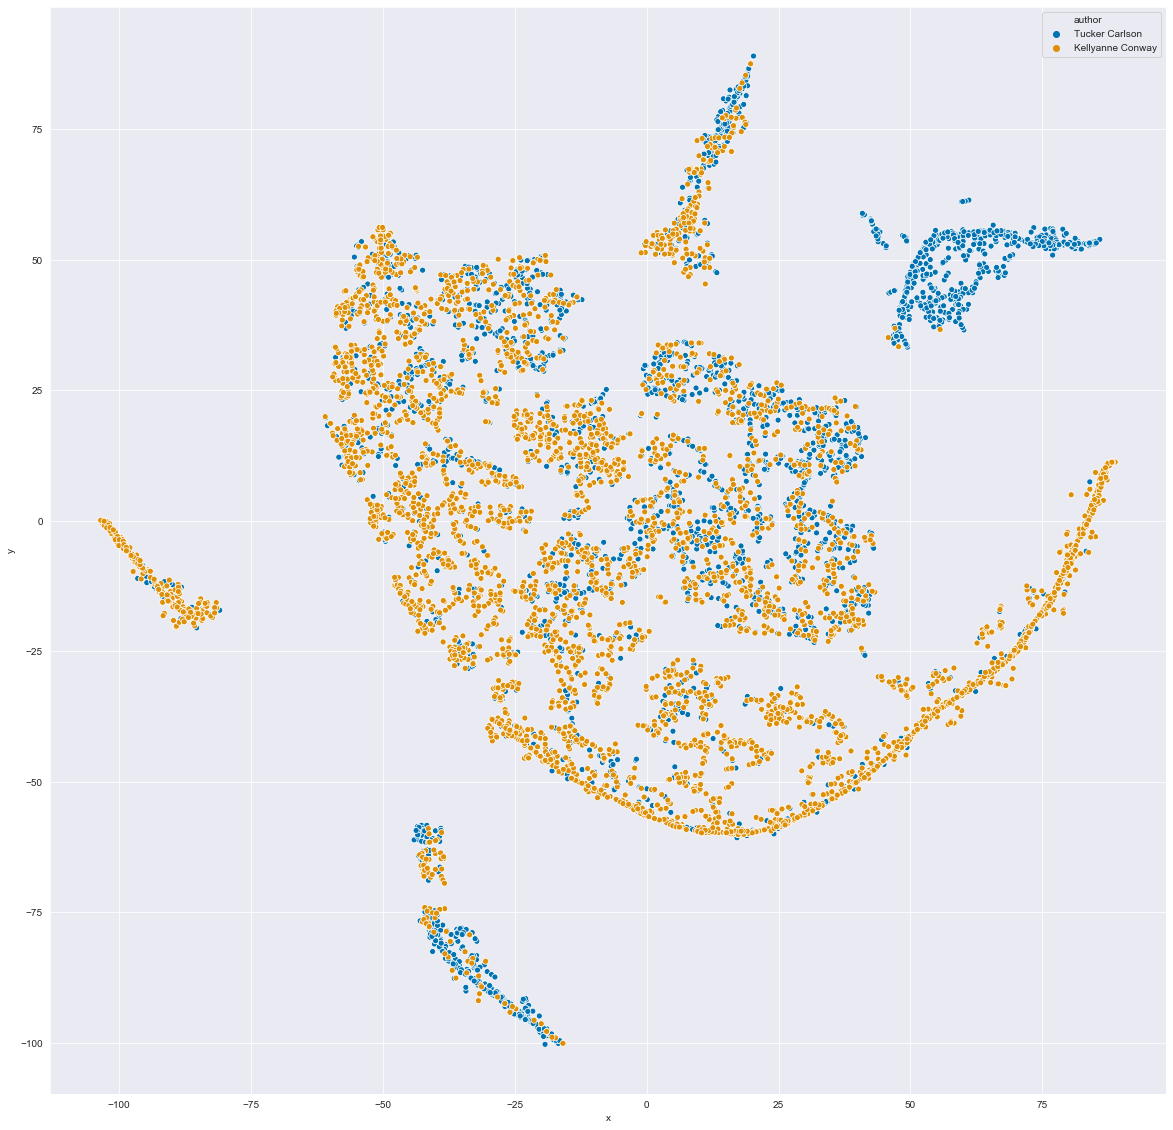

In [449]:
%pylab inline
figsize(20,20)
current_palette = sns.color_palette()
plot_df_3 = pd.DataFrame()

#cmap = sns.color_palette("RdBu_r", 13)
plot_df_3["x"] = data_to_plot_3[:,0]
plot_df_3["y"] = data_to_plot_3[:,1]
plot_df_3["author"] = list(data_3["name"])
sns.scatterplot("x", "y", hue="author", data=plot_df_3,palette= "colorblind");



In [ ]:
# my dataset is data
# my reduced is data_to_plot



In [75]:
data.iloc[12]

name                                            Arianna Huffington
tweet            What’s often left out of the self-care convers...
tweet_cleaned    Whats,often,left,selfcare,conversation,much,ga...
Name: 16, dtype: object

In [80]:
print(doc_topic.shape, data.shape)

(25677, 5) (25677, 3)


In [78]:
doc_topic

array([[0.        , 0.01771571, 0.00032627, 0.00265387, 0.00828175],
       [0.        , 0.00018499, 0.        , 0.        , 0.07947611],
       [0.        , 0.01512383, 0.        , 0.01755516, 0.00032058],
       ...,
       [0.        , 0.01600176, 0.00152212, 0.        , 0.00113144],
       [0.        , 0.01733448, 0.        , 0.        , 0.00063458],
       [0.        , 0.01892565, 0.        , 0.        , 0.        ]])

In [187]:
testing_dotun = testing_dotun.reset_index(level=0, inplace=True)

In [175]:
testing_dotun["original index"] = testing_dotun.index.astype(str)


In [176]:
testing_dotun.head()


,name,tweet,tweet_cleaned,original index
0,Arianna Huffington,"At age 79, Jim Owen eased his chronic back pai...","At,age,Jim,Owen,eased,chronic,back,pain,could,...",0
1,Arianna Huffington,Love this episode of #MeditativeStory from @Ap...,"Love,episode,Global,Creative,Director,manifest...",1
2,Arianna Huffington,The rise of hustle-culture has real effects on...,"The,rise,hustleculture,ha,real,effect,mental,w...",2
4,Arianna Huffington,Excited to see @ApplePodcasts featuring #Medit...,"Excited,see,featuring,top,homepage,So,proud,te...",4
5,Arianna Huffington,"Reaching milestones should be celebrated, of c...","Reaching,milestone,celebrated,course,dont,need...",5


# Check here Dotun: Merci

In [192]:
testing_dotun = data.copy()

In [195]:
testing_dotun["original_index"] = testing_dotun.index

In [217]:
list_author = []
for row in testing_dotun["name"]:
#     print(row.index)
    if row == "Michelle Obama":
        list_author.append(original_index.value)
list_author

TypeError: index() takes at least 1 argument (0 given)

In [199]:
testing_dotun["original_index"] = testing_dotun["original_index"].astype(str)
testing_dotun[testing_dotun["name"] == "Michelle Obama"]

,name,tweet,tweet_cleaned,original_index
0,Michelle Obama,"Always breaking barriers, @Simone_Biles—couldn...","Always,breaking,barrier,Bilescouldnt,proud",0
1,Michelle Obama,One of the best experiences of my life has bee...,"One,best,experience,life,ha,meeting,young,peop...",1
2,Michelle Obama,So proud to join all these extraordinary women...,"So,proud,join,extraordinary,woman,tribute,legend",2
3,Michelle Obama,#EqualityCantWait because every woman deserves...,"every,woman,deserves,seat,table,Proud,friend,m...",3
4,Michelle Obama,Thrilled to visit with @CocoGauff today—a wond...,"Thrilled,visit,todaya,wonderful,young,woman,sh...",4
5,Michelle Obama,"As part of #NationalGirlfriendsDay, let's give...","As,part,let,give,shoutout,friend,always,back,M...",5
6,Michelle Obama,"On #NationalDanceDay, I'm shouting out the Le...","On,Im,shouting,Lethal,Ladies,Baltimore,STEP,te...",6
7,Michelle Obama,I am so proud of everyone I met today at the #...,"I,proud,everyone,I,met,today,Summit,To,anyone,...",7
8,Michelle Obama,What truly makes our country great is its dive...,"What,truly,make,country,great,diversity,Ive,se...",8
9,Michelle Obama,"Next Tuesday, I'll host our 5th anniversary #B...","Next,Tuesday,Ill,host,th,anniversary,Summit,Th...",9


In [188]:
testing_dotun = testing_dotun.reset_index(level=0, inplace=True)
testing_dotun[testing_dotun["name"] == "Michelle Obama"]




TypeError: 'NoneType' object is not subscriptable

In [189]:
testing_dotun
    

In [136]:
data[data["name"]=="Michelle Obama"]

,name,tweet,tweet_cleaned,original index
0,Michelle Obama,"Always breaking barriers, @Simone_Biles—couldn...","Always,breaking,barrier,Bilescouldnt,proud",0
1,Michelle Obama,One of the best experiences of my life has bee...,"One,best,experience,life,ha,meeting,young,peop...",1
2,Michelle Obama,So proud to join all these extraordinary women...,"So,proud,join,extraordinary,woman,tribute,legend",2
3,Michelle Obama,#EqualityCantWait because every woman deserves...,"every,woman,deserves,seat,table,Proud,friend,m...",3
4,Michelle Obama,Thrilled to visit with @CocoGauff today—a wond...,"Thrilled,visit,todaya,wonderful,young,woman,sh...",4
5,Michelle Obama,"As part of #NationalGirlfriendsDay, let's give...","As,part,let,give,shoutout,friend,always,back,M...",5
6,Michelle Obama,"On #NationalDanceDay, I'm shouting out the Le...","On,Im,shouting,Lethal,Ladies,Baltimore,STEP,te...",6
7,Michelle Obama,I am so proud of everyone I met today at the #...,"I,proud,everyone,I,met,today,Summit,To,anyone,...",7
8,Michelle Obama,What truly makes our country great is its dive...,"What,truly,make,country,great,diversity,Ive,se...",8
9,Michelle Obama,"Next Tuesday, I'll host our 5th anniversary #B...","Next,Tuesday,Ill,host,th,anniversary,Summit,Th...",9


In [118]:
df = data[data["name"]=="Michelle Obama"]

df

,name,tweet,tweet_cleaned


# Building DataSet for only Sarah Pallin and Hilarry Clinton

In [95]:
#test= data[data["name"] == "Michelle Obama"].set_index(key = data.indexes)
data.index[data['name'] == "Michelle Obama"].tolist()

IndexError: arrays used as indices must be of integer (or boolean) type

In [96]:
testing = data[data["name"]==["Michelle Obama"]]

ValueError: Lengths must match to compare

In [40]:
# Create Dictionary
data_ready = data['tweet_cleaned'].values
id2word = corpora.Dictionary(data_ready)
corpus = [id2word.doc2bow(text) for text in data_ready]
# Create Corpus: Term Document Frequency
#corpus = [id2word.doc2bow(text) for text in data_ready]

In [41]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           passes=5)
                                           #per_word_topics=20)


In [42]:
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = lda_model.show_topic(i, topn = 10);
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

In [43]:
get_lda_topics(lda_model, 5)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,The,I,The,Trump,tonight
1,Hillary,new,folk,To,Thanks
2,House,This,US,The,Thank
3,Alaska,u,News,In,wa
4,US,wa,YouTube,Is,Sarah
5,Her,one,Says,Facebook,great
6,To,see,America,President,This
7,RT,love,Up,On,forward
8,Day,time,We,For,Obamas
9,White,get,Border,Of,today


In [44]:
print(lda_model.print_topics())

[(0, '0.009*"The" + 0.007*"Hillary" + 0.006*"House" + 0.006*"Alaska" + 0.006*"US" + 0.006*"Her" + 0.005*"To" + 0.004*"RT" + 0.004*"Day" + 0.004*"White"'), (1, '0.035*"I" + 0.010*"new" + 0.009*"This" + 0.008*"u" + 0.008*"wa" + 0.007*"one" + 0.007*"see" + 0.006*"love" + 0.006*"time" + 0.006*"get"'), (2, '0.010*"The" + 0.006*"folk" + 0.005*"US" + 0.005*"News" + 0.005*"YouTube" + 0.005*"Says" + 0.005*"America" + 0.005*"Up" + 0.005*"We" + 0.004*"Border"'), (3, '0.025*"Trump" + 0.016*"To" + 0.013*"The" + 0.011*"In" + 0.010*"Is" + 0.010*"Facebook" + 0.008*"President" + 0.008*"On" + 0.008*"For" + 0.008*"Of"'), (4, '0.009*"tonight" + 0.007*"Thanks" + 0.007*"Thank" + 0.007*"wa" + 0.006*"Sarah" + 0.006*"great" + 0.006*"This" + 0.005*"forward" + 0.005*"Obamas" + 0.005*"today"')]


In [ ]:
from sklearn import manifold


tsne = manifold.TSNE()

data_to_plot = tsne.fit_transform()

In [46]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 5
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

TypeError: cannot unpack non-iterable int object

In [28]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 5
plot_df = pd.DataFrame()

plot_df["x"] = tsne_lda[:,0]
plot_df["y"] = tsne_lda[:,1]
plot_df["author"] = list(data.loc["name"])
current_palette = sns.color_palette()

sns.scatterplot("x", "y", hue="author", data=plot_df,palette= current_palette)
# current_palette = sns.color_palette()
# mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
# plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
#               plot_width=900, plot_height=700)
# plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

TypeError: cannot unpack non-iterable int object